In [102]:
#load data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


## Self analysis

We start our investigation by analyzing the extracting the comparison of the same speaker.

count    285.000000
mean       0.991094
std        0.004035
min        0.970732
25%        0.989072
50%        0.991943
75%        0.993985
max        0.998221
Name: Cosine_Similarity, dtype: float64


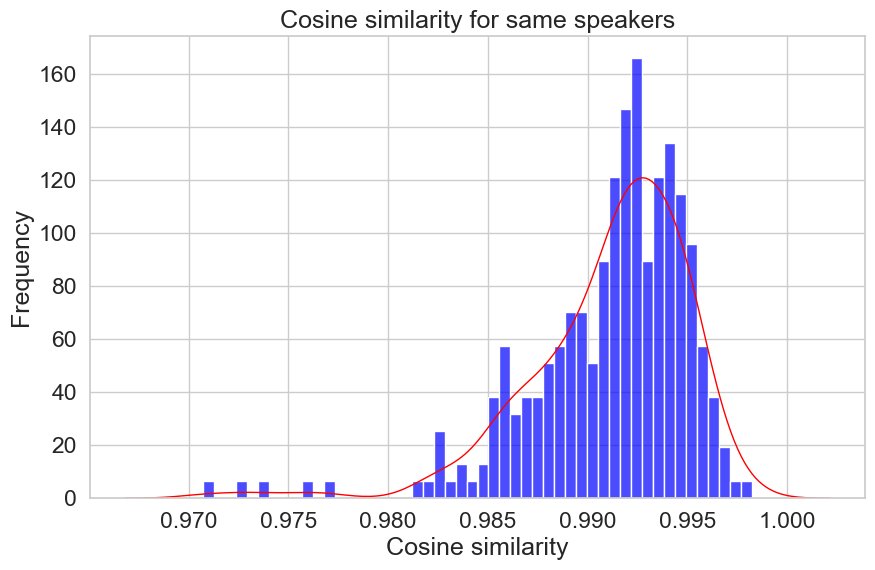

In [103]:
# load data
df_summary = pd.read_csv(os.path.join(
    'data',
    'results',
    'similarity_results_summary_processed.csv'))

# get same speakers comparison
df_same_speakers = df_summary[
    (df_summary['1_speaker'] == df_summary['2_speaker']) & 
    (df_summary['1_gender'] == df_summary['2_gender'])
]

# get description
print(df_same_speakers['Cosine_Similarity'].describe())

# plot
plt.figure(figsize=(10, 6))

sns.histplot(df_same_speakers['Cosine_Similarity'], bins=50, alpha=0.7, color='blue', stat='density')
sns.kdeplot(df_same_speakers['Cosine_Similarity'], color='red', linewidth=1)

plt.xlabel('Cosine similarity')
plt.ylabel('Frequency')
plt.title('Cosine similarity for same speakers')
plt.show()

same_speakers_range = (df_same_speakers['Cosine_Similarity'].min(), df_same_speakers['Cosine_Similarity'].max())


count    10440.000000
mean         0.826234
std          0.084119
min          0.405884
25%          0.781043
50%          0.841062
75%          0.888361
max          0.979828
Name: Cosine_Similarity, dtype: float64
count    9730.000000
mean        0.882221
std         0.062833
min         0.523470
25%         0.848549
50%         0.895222
75%         0.928927
max         0.989317
Name: Cosine_Similarity, dtype: float64


C:\Users\carme\AppData\Local\Temp\ipykernel_5156\950685613.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


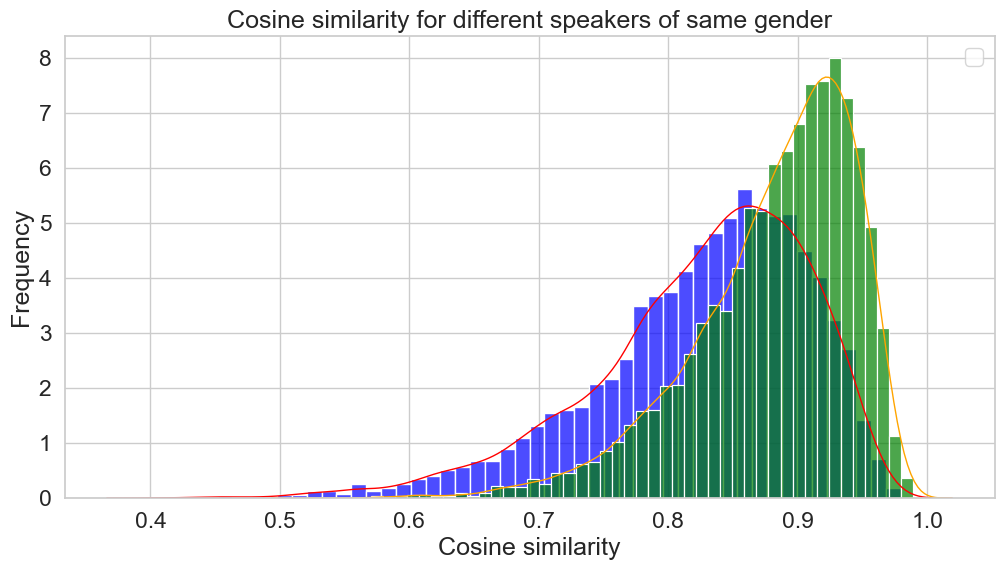

In [104]:
#  get comparison across different speakers
df_different_speakers = df_summary[~df_summary.index.isin(df_same_speakers.index)]


#select all 1_gender male and 2_gender male
df_males_self = df_different_speakers[(df_different_speakers['1_gender'] == 'male') & (df_different_speakers['2_gender'] == 'male')]
df_females_self = df_different_speakers[(df_different_speakers['1_gender'] == 'female') & (df_different_speakers['2_gender'] == 'female')]

# describe for males
print(df_males_self['Cosine_Similarity'].describe())

# describe for females
print(df_females_self['Cosine_Similarity'].describe())

# plot a histogram of cosine similarity superimpose male and femaple plots
plt.figure(figsize=(12, 6))

sns.histplot(df_males_self['Cosine_Similarity'], bins=50, alpha=0.7, color='blue', stat='density')
sns.kdeplot(df_males_self['Cosine_Similarity'], color='red', linewidth=1)

sns.histplot(df_females_self['Cosine_Similarity'], bins=50, alpha=0.7, color='green', stat='density')
sns.kdeplot(df_females_self['Cosine_Similarity'], color='orange', linewidth=1)

plt.xlabel('Cosine similarity')
plt.ylabel('Frequency')
plt.title('Cosine similarity for different speakers of same gender')
plt.legend()
plt.show()

different_speakers_male_range = (df_males_self['Cosine_Similarity'].min(), df_males_self['Cosine_Similarity'].max())
different_speakers_female_range = (df_females_self['Cosine_Similarity'].min(), df_females_self['Cosine_Similarity'].max())

count    20300.000000
mean         0.691336
std          0.107674
min          0.300067
25%          0.614692
50%          0.697979
75%          0.773277
max          0.959360
Name: Cosine_Similarity, dtype: float64


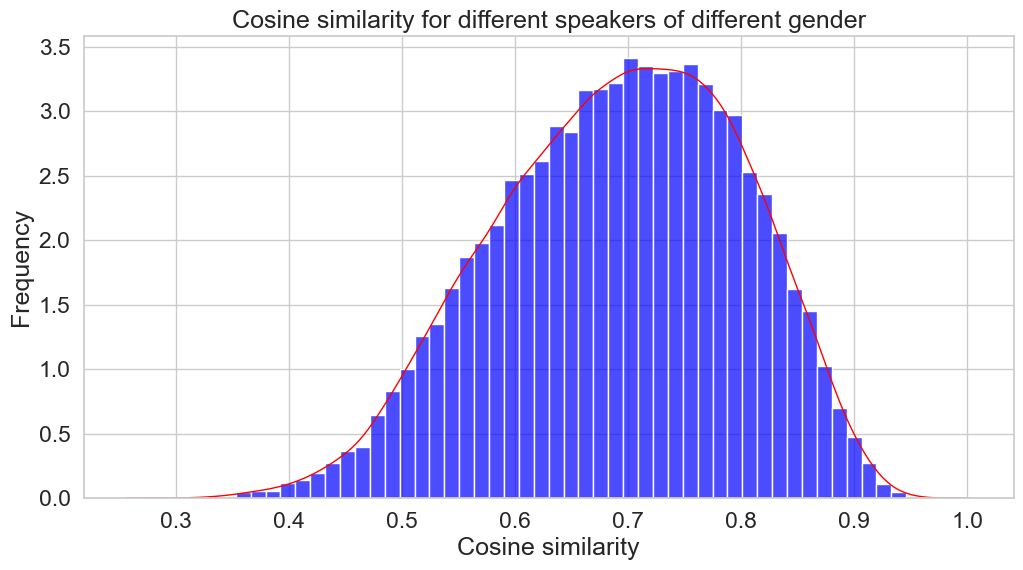

In [105]:
df_males_cross = df_different_speakers[
    (df_different_speakers['1_gender'] == 'male') & (df_different_speakers['2_gender'] == 'female') | 
    (df_different_speakers['1_gender'] == 'female') & (df_different_speakers['2_gender'] == 'male')
]

print(df_males_cross['Cosine_Similarity'].describe())


plt.figure(figsize=(12, 6))

sns.histplot(df_males_cross['Cosine_Similarity'], bins=50, alpha=0.7, color='blue', stat='density')
sns.kdeplot(df_males_cross['Cosine_Similarity'], color='red', linewidth=1)

plt.xlabel('Cosine similarity')
plt.ylabel('Frequency')
plt.title('Cosine similarity for different speakers of different gender')
plt.show()

different_gender_range = (df_males_cross['Cosine_Similarity'].min(), df_males_cross['Cosine_Similarity'].max())

(np.float64(0.9707320928573608), np.float64(0.9982212781906128))
(np.float64(0.405883640050888), np.float64(0.9798275828361512))
(np.float64(0.5234702229499817), np.float64(0.9893171191215516))
(np.float64(0.3000668287277221), np.float64(0.9593602418899536))


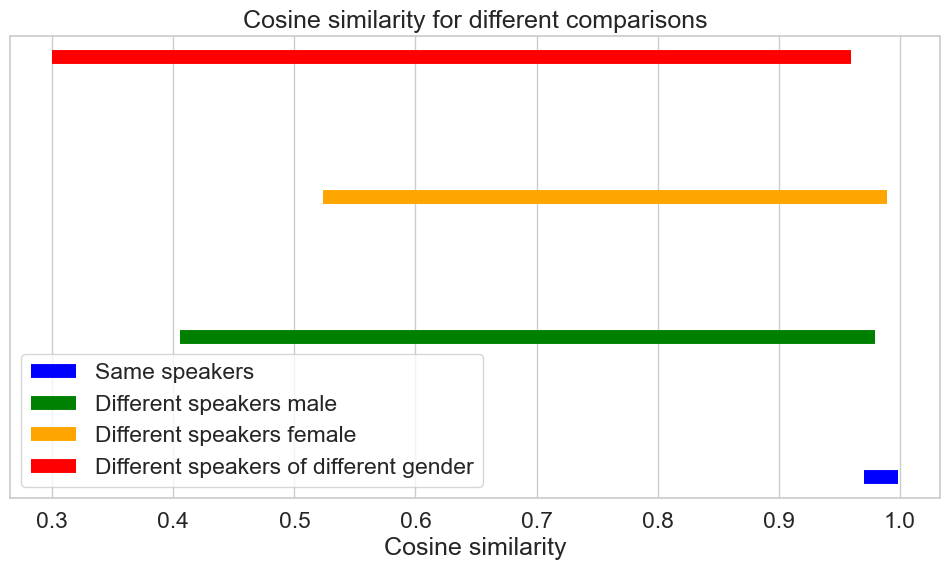

In [106]:
print(same_speakers_range)
print(different_speakers_male_range)
print(different_speakers_female_range)
print(different_gender_range)

same_gender_range = (df_same_speakers['Cosine_Similarity'].min(), df_same_speakers['Cosine_Similarity'].max())

# plot these ranges as horizontal bars

plt.figure(figsize=(12, 6))

plt.hlines(1, same_speakers_range[0], same_speakers_range[1], color='blue', label='Same speakers', linewidth=10)
plt.hlines(2, different_speakers_male_range[0], different_speakers_male_range[1], color='green', label='Different speakers male', linewidth=10)
plt.hlines(3, different_speakers_female_range[0], different_speakers_female_range[1], color='orange', label='Different speakers female', linewidth=10)
plt.hlines(4, different_gender_range[0], different_gender_range[1], color='red', label='Different speakers of different gender', linewidth=10)

plt.yticks([])
plt.xlabel('Cosine similarity')
plt.title('Cosine similarity for different comparisons')
plt.legend(loc='lower left')
plt.show()


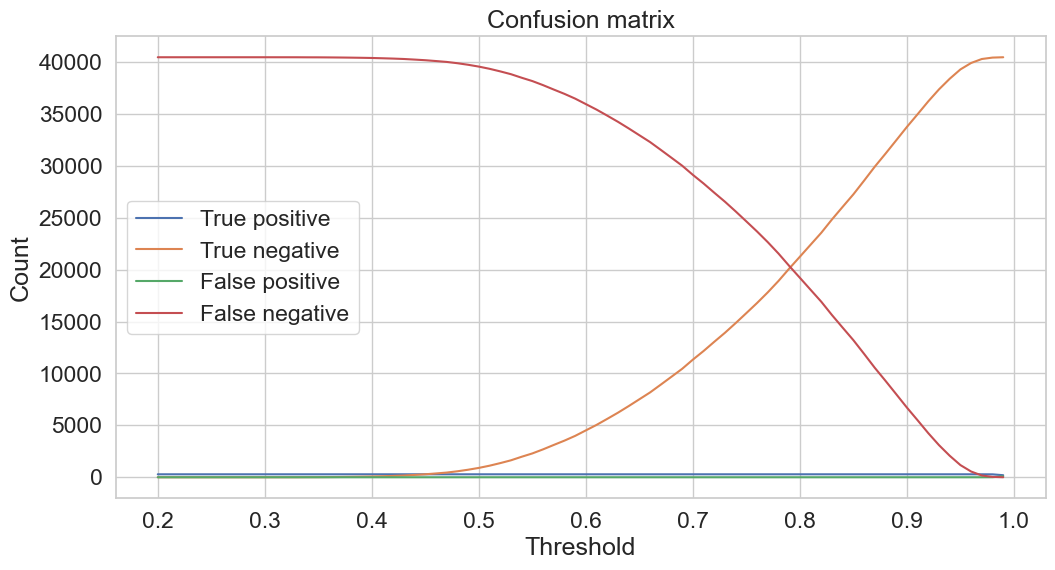

In [107]:

def calculate_metrics(threshold):
    df_summary['same_speaker_calculated'] = df_summary['Cosine_Similarity'] > threshold

    actual_same_speaker = (
        df_summary['1_speaker'] == df_summary['2_speaker']
    ) & (
        df_summary['1_gender'] == df_summary['2_gender']
    )

    predicted_same_speaker = df_summary['same_speaker_calculated']

    true_positive_count = len(df_summary[actual_same_speaker & predicted_same_speaker])
    true_negative_count = len(df_summary[~actual_same_speaker & ~predicted_same_speaker])
    false_positive_count = len(df_summary[actual_same_speaker & ~predicted_same_speaker])
    false_negative_count = len(df_summary[~actual_same_speaker & predicted_same_speaker])

    return true_positive_count, true_negative_count, false_positive_count, false_negative_count



thresholds = np.arange(0.2, 1, 0.01)
true_positives = []
true_negatives = []
false_positives = []
false_negatives = []


for threshold in thresholds:
    tp, tn, fp, fn = calculate_metrics(threshold)
    true_positives.append(tp)
    true_negatives.append(tn)
    false_positives.append(fp)
    false_negatives.append(fn)
    
    
# plot the results
plt.figure(figsize=(12, 6))

plt.plot(thresholds, true_positives, label='True positive')
plt.plot(thresholds, true_negatives, label='True negative')
plt.plot(thresholds, false_positives, label='False positive')
plt.plot(thresholds, false_negatives, label='False negative')

plt.xlabel('Threshold')
plt.ylabel('Count')
plt.title('Confusion matrix')
plt.legend()
plt.show()


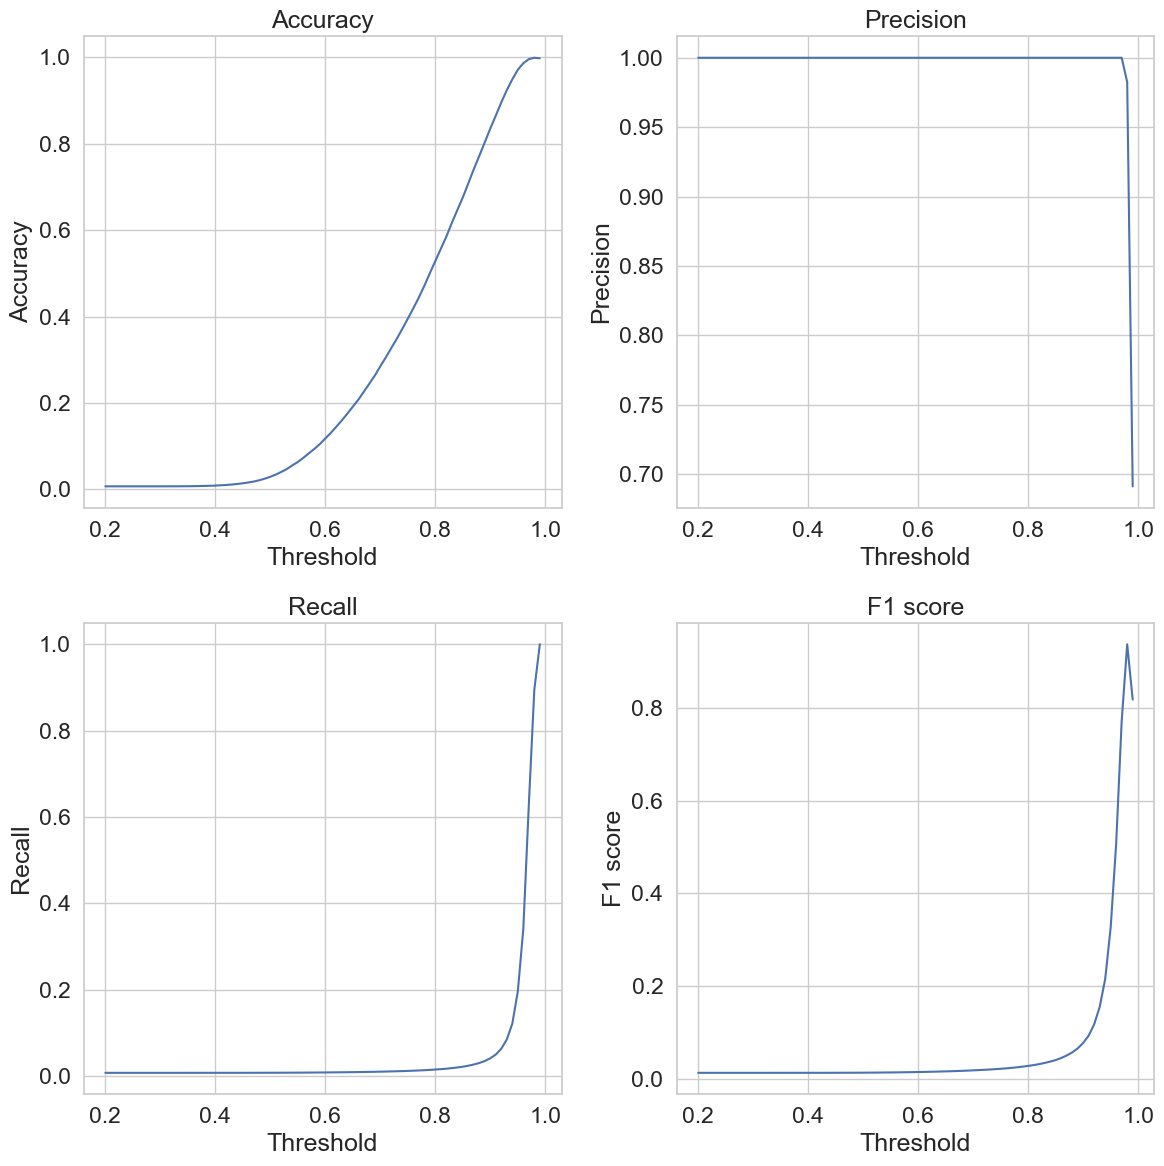

In [109]:
accuracies = []
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    tp, tn, fp, fn = calculate_metrics(threshold)
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)
    
# plot in different  subplots
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.plot(thresholds, accuracies)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy')

plt.subplot(2, 2, 2)
plt.plot(thresholds, precisions)
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision')

plt.subplot(2, 2, 3)
plt.plot(thresholds, recalls)
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall')

plt.subplot(2, 2, 4)
plt.plot(thresholds, f1_scores)
plt.xlabel('Threshold')
plt.ylabel('F1 score')
plt.title('F1 score')

plt.tight_layout()
plt.show()




